In [56]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from lr_utils import load_dataset    
    
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

train_set_x_orig , train_set_y , test_set_x_orig , test_set_y , classes = load_dataset()
#index=25 测试
#plt.imshow(train_set_x_orig[index])
#print("y=" + str(train_set_y[:,index]) +", it's a " + classes[np.squeeze(train_set_y[:,index])].decode('utf-8') + " picture")

m_train=train_set_y.shape[1]
m_test=test_set_y.shape[1]
num_px=train_set_x_orig.shape[1]
#print ("训练集的数量: m_train = " + str(m_train))
#print ("测试集的数量 : m_test = " + str(m_test))
#print ("每张图片的宽/高 : num_px = " + str(num_px))
#print ("每张图片的大小 : (" + str(num_px) + ", " + str(num_px) + ", 3)")
#print ("训练集_图片的维数 : " + str(train_set_x_orig.shape))
#print ("训练集_标签的维数 : " + str(train_set_y.shape))
#print ("测试集_图片的维数: " + str(test_set_x_orig.shape))
#print ("测试集_标签的维数: " + str(test_set_y.shape))


train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten=test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
#print ("训练集降维最后的维度： " + str(train_set_x_flatten.shape))
#print ("训练集_标签的维数 : " + str(train_set_y.shape))
#print ("测试集降维之后的维度: " + str(test_set_x_flatten.shape))
#print ("测试集_标签的维数 : " + str(test_set_y.shape))

train_set_x=train_set_x_flatten/225
test_set_x=test_set_x_flatten/225

def sigmoid(z):
    s=1/(1+np.exp(-z))
    return s

#print("=====test sigmoid function=====")
#print("sigmoid(0)= "+ str(sigmoid(0)))

def initialize_with_zeros(dim):
    w=np.zeros(shape=(dim,1))
    b=0
    assert(w.shape==(dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    return (w,b)

def propagate(w,b,X,Y):
    m= X.shape[1]
    A=sigmoid(np.dot(w.T,X) + b)
    cost=(-1/m)*np.sum(Y*np.log(A)+(1-Y)* (np.log(1-A)))
    dw=(1/m)*np.dot(X,(A-Y).T)
    db=(1/m)*np.sum(A-Y)
    
    assert(dw.shape==w.shape)
    assert(db.dtype==float)
    cost=np.squeeze(cost)
    assert(cost.shape==())
    grads={"dw":dw,"db":db}
    return(grads,cost)
#测试一下propagate
#print("====================测试propagate====================")
#初始化一些参数
#w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
#grads, cost = propagate(w, b, X, Y)
#print ("dw = " + str(grads["dw"]))
#print ("db = " + str(grads["db"]))
#print ("cost = " + str(cost))
#print(X.shape)
#print(Y.shape)

def optimize(w,b,X,Y,num_iterations, learning_rate, print_cost=False):
    costs=[]
    for i in range(num_iterations):
        grads,cost=propagate(w,b,X,Y)
        dw=grads["dw"]
        db=grads["db"]
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i%100==0:
            costs.append(cost)
        if(print_cost)and(i%100==0):
            print("迭代的次数：%i, 误差值：%f" %(i,cost))
    #for循环结束        
    params={"w":w, 
            "b":b}
        
    grads={"dw":dw,
            "db":db}
        
    return(params,grads,costs)

    
#测试optimize
#print("====================测试optimize====================")
#w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
#params , grads , costs = optimize(w , b , X , Y , num_iterations=100 , learning_rate = 0.009 , print_cost = False)
#print ("w = " + str(params["w"]))
#print ("b = " + str(params["b"]))
#print ("dw = " + str(grads["dw"]))
#print ("db = " + str(grads["db"]))

def predict(w,b,X):
    m=X.shape[1]
    Y_prediction=np.zeros((1,m))
    w=w.reshape(X.shape[0],1)
    
    A=sigmoid(np.dot(w.T,X)+b)
    for i in range(A.shape[1]):
        Y_prediction[0,i] =1 if A[0,i]>0.5 else 0
    assert(Y_prediction.shape==(1,m))
    return Y_prediction
#测试predict
#print("====================测试predict====================")
#w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
#print("predictions = " + str(predict(w, b, X)))

def model(X_train,Y_train,X_test,Y_test,num_iterations=2000,learning_rate=0.5,print_cost=False):
    w,b= initialize_with_zeros(X_train.shape[0])
    
    parameters,grads,costs=optimize(w,b,X_train,Y_train,num_iterations,learning_rate,print_cost)
    w,b=parameters["w"], parameters["b"]
    
    Y_prediction_test=predict(w,b,X_test)
    Y_prediction_train=predict(w,b,X_train)
    
    print("训练集准确性:", format(100-np.mean(np.abs(Y_prediction_train - Y_train)) * 100),"%")
    print("测试集准确性:", format(100-np.mean(np.abs(Y_prediction_test - Y_test)) * 100),"%")
    
    d={
        "costs":costs,
        "Y_prediction_test":Y_prediction_test,
        "Y_prediction_train":Y_prediction_train,
        "w":w,
        "b":b,
        "learning rate": learning_rate,
        "num_iterations": num_iterations
    }
    return d
print("====================测试model====================")     
#这里加载的是真实的数据，请参见上面的代码部分。
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1000, learning_rate = 0.005, print_cost = True)

====================测试model====================
迭代的次数：0, 误差值：0.693147
迭代的次数：100, 误差值：0.666606
迭代的次数：200, 误差值：0.561558
迭代的次数：300, 误差值：0.462665
迭代的次数：400, 误差值：0.369722
迭代的次数：500, 误差值：0.287033
迭代的次数：600, 误差值：0.238140
迭代的次数：700, 误差值：0.219626
迭代的次数：800, 误差值：0.204239
迭代的次数：900, 误差值：0.190877
训练集准确性: 97.12918660287082 %
测试集准确性: 70.0 %


learning rate is: 0.01
训练集准确性: 99.52153110047847 %
测试集准确性: 70.0 %

-------------------------------------------------------

learning rate is: 0.001
训练集准确性: 91.38755980861244 %
测试集准确性: 68.0 %

-------------------------------------------------------

learning rate is: 0.0001
训练集准确性: 70.33492822966508 %
测试集准确性: 40.0 %

-------------------------------------------------------



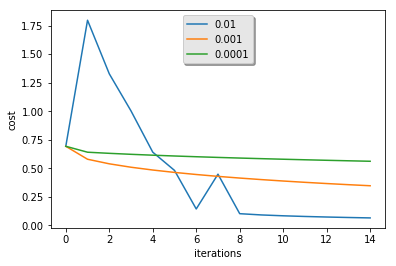

In [59]:
#绘制图
learning_rates=[0.01,0.001,0.0001]
models={}
for i in learning_rates:
    print("learning rate is: "+ str(i))
    models[str(i)]=model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')
    
for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]['costs']),label=str(models[str(i)]["learning rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend=plt.legend(loc='upper center',shadow=True)
frame=legend.get_frame()
frame.set_facecolor('0.90')
plt.show()